In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from strobo import get_gaussian, plot_time
from strobo import Stroboscopy, MonteCarlo

### Initialization

In [2]:
x0 = -4 # Position (t=0)
p = 3 # Momentum
std = 1 # Standard deviation (t=0)
mass = 1 # Mass
wave_packet = get_gaussian(x0,p,std,mass) # Gaussian wavepacket

### Stroboscopy

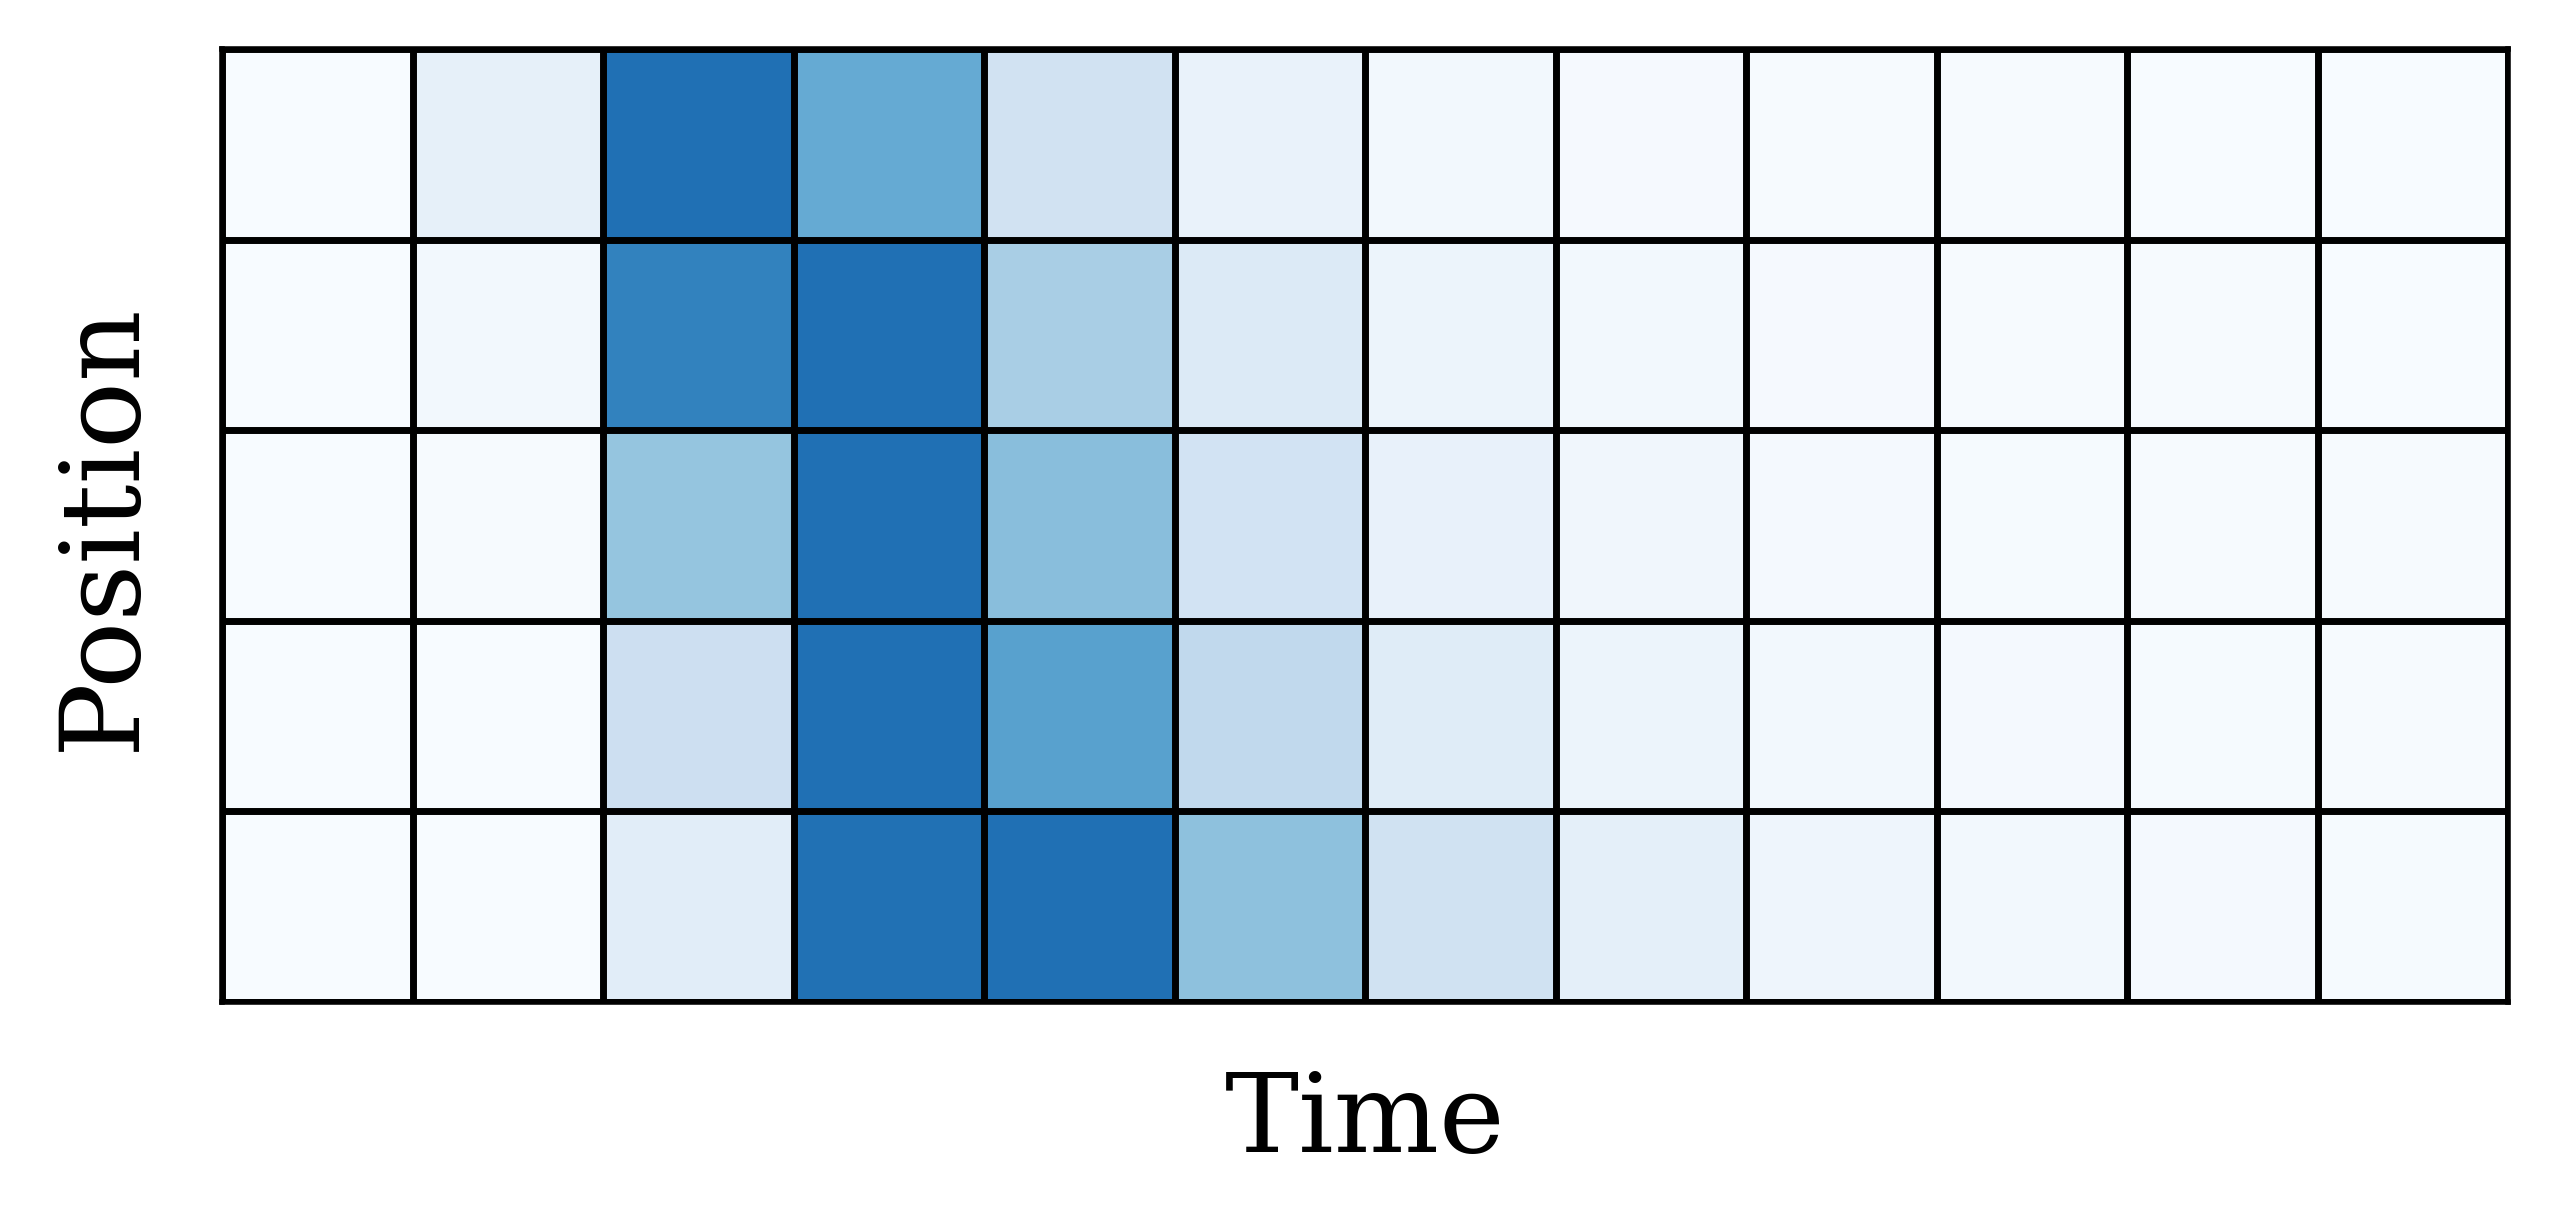

In [3]:
strobo = Stroboscopy(num_T=12, num_X=5, min_T=0, max_T=6, min_X=-2.5, max_X=2.5) 
detector_bin = 1 # Detector bin [0,...,num_X-1]
prob_strobo, prob_time = strobo.get_results(wave_packet) # Do stroboscopy
strobo.plot_grid(name = 'grid', show = True) # Show bins

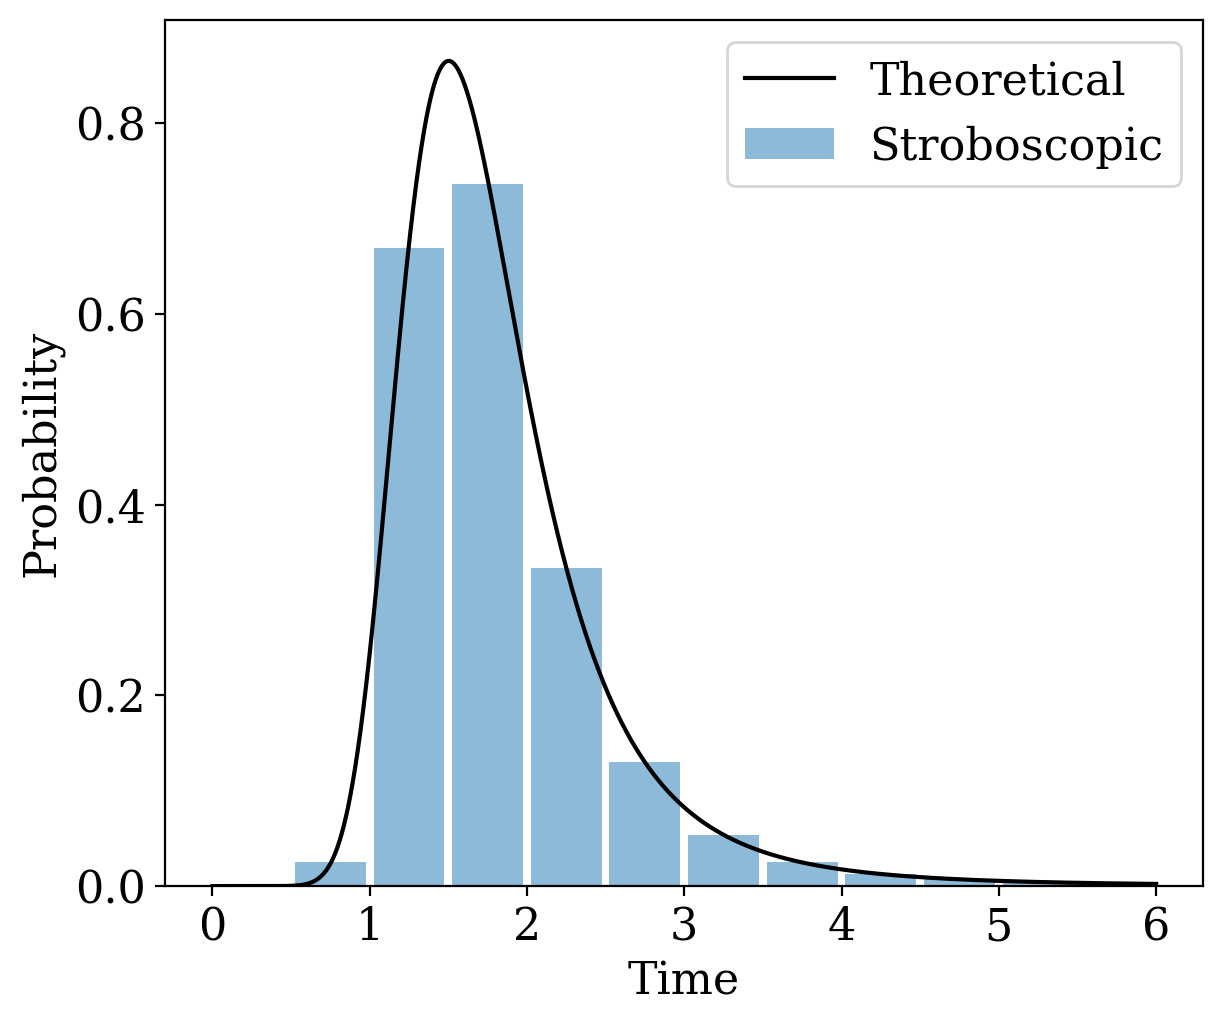

In [4]:
plot_time(strobo, prob_time[detector_bin,:], probs = [prob_strobo[detector_bin,:]],\
          probs_labels = ['Stroboscopic'], name = 'ideal', show = True) # Compare with quantum clock

### Stroboscopy (Simulation)

In [5]:
rng = np.random.default_rng(2025)
num_samples = int(1e+4) # Size of the sample
width = 0.35 # Width of each POVM component

In [6]:
povm = MonteCarlo(detector_bin, wave_packet, strobo, width, rng) # Generate the POVM
probs_real = povm.get_samples(strobo, num_samples)

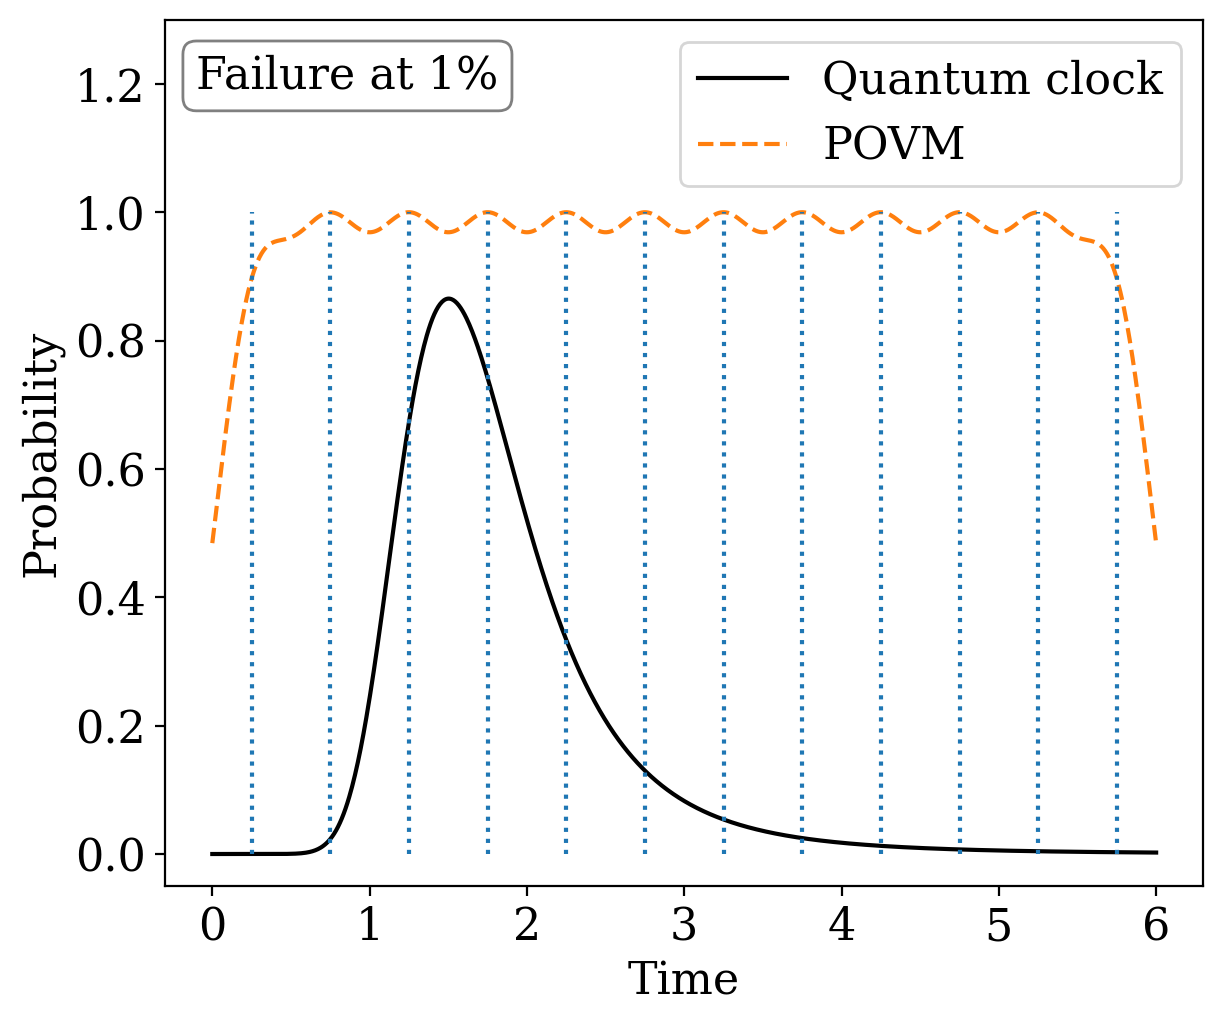

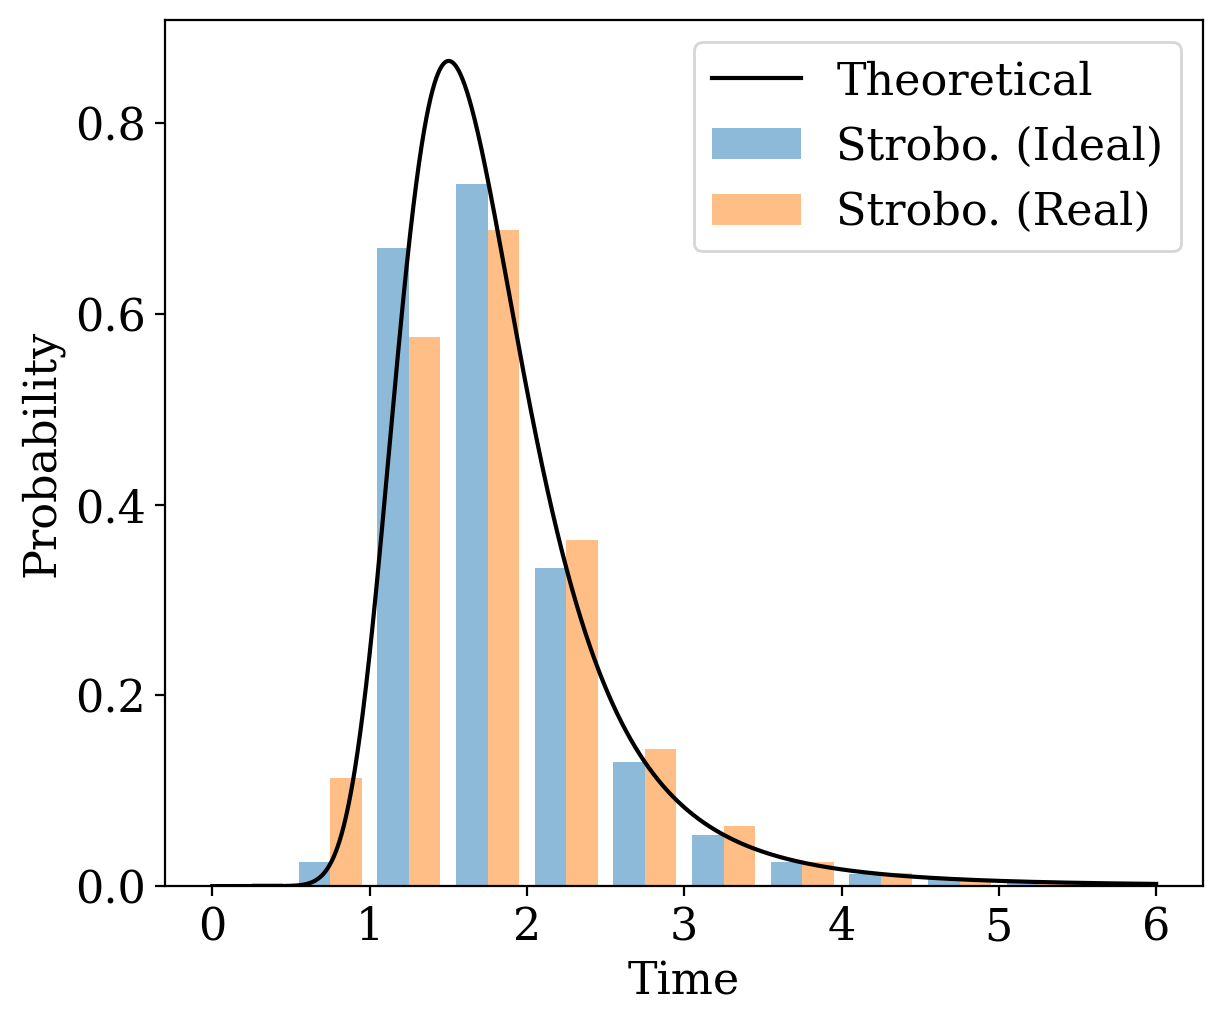

In [7]:
povm.plot_povm(1000, name = 'povm', show = True)
plot_time(strobo, prob_time[detector_bin,:], probs = [prob_strobo[detector_bin,:], probs_real],\
          probs_labels = ['Strobo. (Ideal)','Strobo. (Real)'], name = 'real', show = True) # Compare with quantum clock

#### Plots

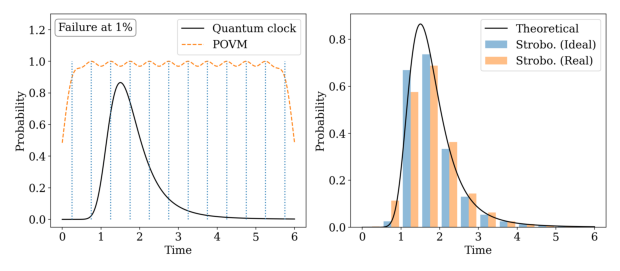

In [8]:
imgs = ['povm', 'real'] # Filenames
labels = ['(a)', '(b)'] # Sublabels
fig, axs = plt.subplots(1, 2, figsize=(6, 8))
for ax, name, label in zip(axs, imgs, labels):
    ax.imshow(mpimg.imread(f"./.tmp/{name}.png"))
    ax.axis("off")
    # ax.text(0.56, 0.005, label, transform=ax.transAxes, \
    # ha='center', va='top', fontsize=12)
plt.tight_layout(pad = -0.015)
plt.savefig(f"./.tmp/img_{width}.png", dpi=400) # Save